In [15]:
# data science
import math
import numpy
import pandas
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sentiment analysis
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output

In [2]:
df3 = pandas.read_csv('/Users/hejielu/Desktop/final/cleandata.csv')
df3.head()

,dateoftweet,text
0,06/03/2020,israeli priviledge matt lauer somehow jail bac...
1,06/03/2020,normal viewing documentary netflix essential s...
2,06/03/2020,wish say story need voice suppo metoo
3,06/03/2020,psst saw bit blackout tuesday point previous t...
4,06/03/2020,rivera hus hea see many former female student ...


In [4]:
df3.describe()

,dateoftweet,text
count,91653,91653
unique,105,90558
top,06/03/2020,ve now quaratine longer brock turner spent jai...
freq,2546,103


In [5]:
analyzer = SentimentIntensityAnalyzer()
scores = [analyzer.polarity_scores(tweet)['compound'] for tweet in df3['text'].values.tolist()]

In [6]:
df3['sentiment'] = scores
df3.head()

,dateoftweet,text,sentiment
0,06/03/2020,israeli priviledge matt lauer somehow jail bac...,-0.4767
1,06/03/2020,normal viewing documentary netflix essential s...,0.4767
2,06/03/2020,wish say story need voice suppo metoo,0.4019
3,06/03/2020,psst saw bit blackout tuesday point previous t...,0.0000
4,06/03/2020,rivera hus hea see many former female student ...,-0.7430


In [7]:
df3['sentiment_score'] = df3['sentiment']
(df3['sentiment_score'] == 0).value_counts()

False    67685
True     23968
Name: sentiment_score, dtype: int64

In [30]:
df3.loc[df3['sentiment_score'] == 0,'sentiment'] = 'neutral'
df3.loc[df3['sentiment_score'] > 0,'sentiment'] = 'positive'
df3.loc[df3['sentiment_score'] < 0,'sentiment'] = 'negative'
df3.head()

,dateoftweet,text,sentiment,sentiment_score
0,06/03/2020,israeli priviledge matt lauer somehow jail bac...,negative,-0.4767
1,06/03/2020,normal viewing documentary netflix essential s...,positive,0.4767
2,06/03/2020,wish say story need voice suppo metoo,positive,0.4019
3,06/03/2020,psst saw bit blackout tuesday point previous t...,neutral,0.0000
4,06/03/2020,rivera hus hea see many former female student ...,negative,-0.7430


In [12]:
data = df3[['text','sentiment']]

In [17]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.sentiment != "neutral"]

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df3['text'])

Positive words


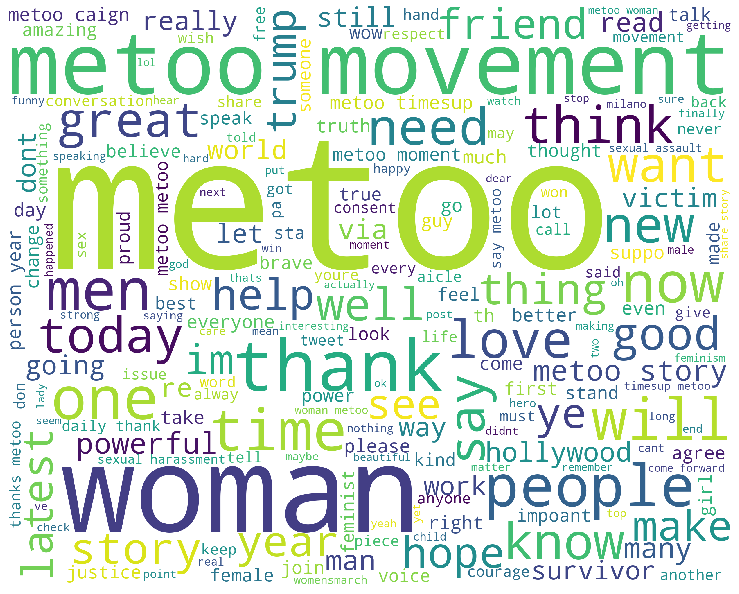

Negative words


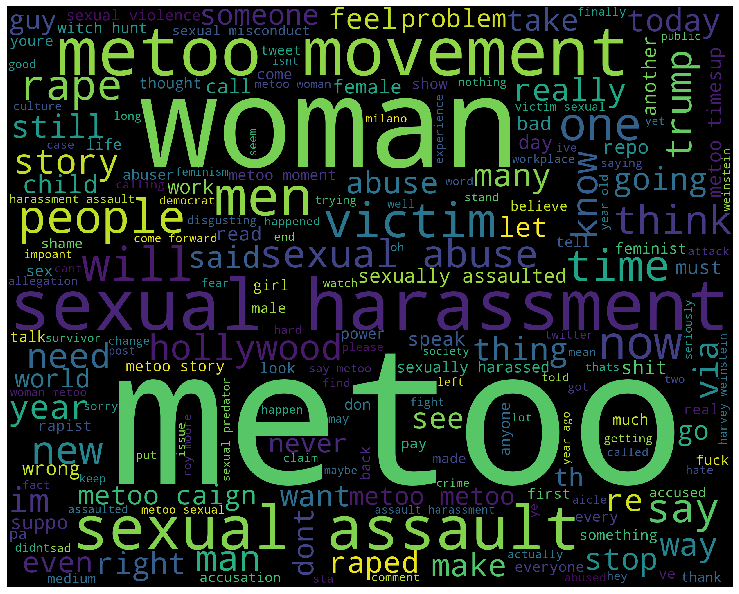

In [19]:
train_pos = train[ train['sentiment'] == 'positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df3['text'])